**作业题：**
1.	计算2017年4月每日的销售额、客流量、客单价，并用图表形式展现
2.	计算2017年4月中周一至周日的销售额、客流量、客单价，并用图表形式展现
3.	随机选取2017年4月中的一天，计算一天中不同小时的销售额、客流量、客单价，并用图表形式展现

**题目说明：**
- 销售额 = 售价 乘 销量 = ["Price"] 乘 ["Qty"]
- 客流量 = 订单量（客流量用订单量代替）
- 客单价 = 销售额/客流量

**业务背景：**
- 通过第一节我们已经判断出了17年4月各指标发展情况的好坏，作为数据分析师，不管业务出现好或者坏，都要去追寻为什么？在追寻为什么的时候，就可以结合业务具体去看是因为哪方面的变化，引起了某一段时间内整体指标的变化。

- 这一节选择时间维度去看一下17年4月不同时间维度各指标的变化情况。


**计算逻辑说明：**
1.	分日的各指标计算类似于分月的各指标计算，只不过这里需要将时间转化为日维度的数据，然后用日期去做透视表就可以算出每一天的各指标情况。
2.	分周、分小时与分日的计算逻辑一致，需要分别把时间转化为周维度、以及小时维度。

# 导入相关库

In [37]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.parser import parse
plt.rcParams["font.sans-serif"]='SimHei'#解决中文乱码
plt.rcParams['axes.unicode_minus'] = False#解决负号无法正常显示的问题

# 导入数据 

In [40]:
#help(pd.read_csv)

In [39]:
#pwd ,parse_dates = ["dimDateID"]
data_fct_sales = pd.read_csv(r"C:\\Users\\lining\\Desktop\\myjob\\My_SQL\\零售fct_sales.csv",index_col=0,parse_dates = ["dimDateID"])
data_fct_sales.tail(13)

,salesID,salesNo,dimDateID,dimShopID,dimMemberID,QTY,AMT,pAMT,mpAMT,updateTime
178330,178331,34131068003752,2017-08-30,34,0,2.00,6.26,0.0,0.0,2017-09-09 10:24:16
178331,178332,34131068003753,2017-08-30,33,0,4.00,14.40,0.0,0.0,2017-09-09 10:24:16
178332,178333,34131068003754,2017-08-30,34,0,2.00,99.80,0.0,0.0,2017-09-09 10:24:16
178333,178334,34131068003755,2017-08-30,33,0,2.00,324.00,0.0,0.0,2017-09-09 10:24:16
178334,178335,34131068003756,2017-08-30,34,0,4.14,36.50,0.0,0.0,2017-09-09 10:24:16
178335,178336,34131068003757,2017-08-30,33,0,2.00,6.26,0.0,0.0,2017-09-09 10:24:16
178336,178337,34131068003758,2017-08-30,34,0,1.00,82.80,0.0,0.0,2017-09-09 10:24:16
178337,178338,34131068003759,2017-08-30,33,0,1.00,35.53,0.0,0.0,2017-09-09 10:24:16
178338,178339,34131068003760,2017-08-30,34,0,1.00,18.90,0.0,0.0,2017-09-09 10:24:16
178339,178340,34131068003761,2017-08-30,33,0,2.00,7.20,0.0,0.0,2017-09-09 10:24:16


In [15]:
#,parse_dates = ["dimDateID"]
data_dim_goods = pd.read_csv(r"C:\\Users\\lining\\Desktop\\myjob\\My_SQL\\零售dim_goods.csv",index_col=0)
data_dim_goods.tail(3)

,dimGoodsID,categoryID1,categoryName1,categoryID2,categoryName2,categoryID3,categoryName3,categoryID4,categoryName4,branName,name
25856,9640482,96,烟酒纯鲜奶,96,酒,4,礼盒酒,2,礼盒装普通白酒,NaN,清明用品(布花)2213
25857,9640483,96,烟酒纯鲜奶,96,酒,4,礼盒酒,2,礼盒装普通白酒,NaN,清明用品(布花)2214
25858,9640484,96,烟酒纯鲜奶,96,酒,4,礼盒酒,2,礼盒装普通白酒,NaN,清明用品(布花)2215


In [28]:
#,parse_dates = ["dimDateID"]
data_fct_sales_item = pd.read_csv(r"C:\\Users\\lining\\Desktop\\myjob\\My_SQL\\零售fct_sales_item.csv",
                                  index_col=0,parse_dates = ["dimDateID"]) #,"updateTime"]
data_fct_sales_item.tail(3)

,id,salesID,salesNo,dimDateID,dimShopID,goodsID,QTY,AMT,pAMT,mpAMT,updateTime
647616,647617,178341,34131068003762,2017-08-30,34,9541278,1.00,42.90,0.0,0.0,2017-09-09 02:24:25
647617,647618,178342,34131068003763,2017-08-30,33,5110667,1.00,29.99,0.0,0.0,2017-09-09 02:24:25
647618,647619,178343,34131068003764,2017-08-30,34,5611552,0.78,13.10,0.0,0.0,2017-09-09 02:24:25


In [29]:
data_fct_sales_item.info()   # 注意dimDateID 变成了 datetime64 类型数据

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647619 entries, 0 to 647618
Data columns (total 11 columns):
id            647619 non-null int64
salesID       647619 non-null int64
salesNo       647619 non-null int64
dimDateID     647619 non-null datetime64[ns]
dimShopID     647619 non-null int64
goodsID       647619 non-null int64
QTY           647619 non-null float64
AMT           647619 non-null float64
pAMT          647619 non-null float64
mpAMT         647619 non-null float64
updateTime    647619 non-null object
dtypes: datetime64[ns](1), float64(4), int64(5), object(1)
memory usage: 59.3+ MB


In [30]:
data_fct_sales_item.shape

(647619, 11)

In [31]:
data_fct_sales_item.drop_duplicates().shape

(647619, 11)

# 数据预处理

In [32]:
data_fct_sales_item["date"] = [parse(str(time)) for time in data_fct_sales_item["dimDateID"]]
data_fct_sales["date"] = [parse(str(time)) for time in data_fct_sales["dimDateID"]]

In [33]:
data_fct_sales.head(3)

,salesID,salesNo,dimDateID,dimShopID,dimMemberID,QTY,AMT,pAMT,mpAMT,updateTime,date
0,1,34131002542176,2017-06-02,33,4821,1.000,7.99,0.0,0.210,2017-09-09 10:24:16,2017-06-02
1,2,34131002542177,2017-06-02,34,1730,1.000,227.00,0.0,12.000,2017-09-09 10:24:16,2017-06-02
2,3,34131002542178,2017-06-02,33,513,5.046,75.64,0.0,3.022,2017-09-09 10:24:16,2017-06-02


In [36]:
data_fct_sales_item["月份"] = [time.month for time in data_fct_sales_item["dimDateID"]]
data_fct_sales["月份"] = [time.month for time in data_fct_sales["dimDateID"]]
#data_2017["月份"] = [time.month for time in data_2017["date"]]

In [41]:
data_fct_sales_item["月份"] .unique()

array([6, 7, 8], dtype=int64)

In [42]:
data_fct_sales_item.head(3)

,id,salesID,salesNo,dimDateID,dimShopID,goodsID,QTY,AMT,pAMT,mpAMT,updateTime,date,月份
0,1,1,34131002542176,2017-06-02,33,5130942,1.0,7.99,0.0,0.21,2017-09-09 02:24:25,2017-06-02,6
1,2,2,34131002542177,2017-06-02,34,7116060,1.0,227.00,0.0,12.00,2017-09-09 02:24:25,2017-06-02,6
2,3,3,34131002542178,2017-06-02,33,5621350,4.0,38.00,0.0,1.96,2017-09-09 02:24:25,2017-06-02,6


In [46]:
data_fct_sales_item.tail(3)

,id,salesID,salesNo,dimDateID,dimShopID,goodsID,QTY,AMT,pAMT,mpAMT,updateTime,date,月份
647616,647617,178341,34131068003762,2017-08-30,34,9541278,1.00,42.90,0.0,0.0,2017-09-09 02:24:25,2017-08-30,8
647617,647618,178342,34131068003763,2017-08-30,33,5110667,1.00,29.99,0.0,0.0,2017-09-09 02:24:25,2017-08-30,8
647618,647619,178343,34131068003764,2017-08-30,34,5611552,0.78,13.10,0.0,0.0,2017-09-09 02:24:25,2017-08-30,8


# 分日趋势图

# 分析6月

In [47]:
April_data = data_fct_sales_item[data_fct_sales_item["月份"] == 6]
April_data.head(8)

,id,salesID,salesNo,dimDateID,dimShopID,goodsID,QTY,AMT,pAMT,mpAMT,updateTime,date,月份
0,1,1,34131002542176,2017-06-02,33,5130942,1.000,7.99,0.0,0.2100,2017-09-09 02:24:25,2017-06-02,6
1,2,2,34131002542177,2017-06-02,34,7116060,1.000,227.00,0.0,12.0000,2017-09-09 02:24:25,2017-06-02,6
2,3,3,34131002542178,2017-06-02,33,5621350,4.000,38.00,0.0,1.9600,2017-09-09 02:24:25,2017-06-02,6
3,4,3,34131002542178,2017-06-02,33,5613232,1.046,37.64,0.0,1.0620,2017-09-09 02:24:25,2017-06-02,6
4,5,4,34131002542179,2017-06-02,34,1170812,1.000,19.80,0.0,1.1000,2017-09-09 02:24:25,2017-06-02,6
5,6,4,34131002542179,2017-06-02,34,5660081,0.422,21.02,0.0,1.5992,2017-09-09 02:24:25,2017-06-02,6
6,7,5,34131002542180,2017-06-02,34,6610605,4.000,39.96,0.0,3.6400,2017-09-09 02:24:25,2017-06-02,6
7,8,5,34131002542180,2017-06-02,34,6220304,3.000,29.97,0.0,1.8300,2017-09-09 02:24:25,2017-06-02,6


In [50]:
April_data["sale_sum"] = (April_data["AMT"]*April_data["QTY"])

C:\Users\lining\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
April_data.head()

,id,salesID,salesNo,dimDateID,dimShopID,goodsID,QTY,AMT,pAMT,mpAMT,updateTime,date,月份,sale_sum
0,1,1,34131002542176,2017-06-02,33,5130942,1.000,7.99,0.0,0.210,2017-09-09 02:24:25,2017-06-02,6,7.99000
1,2,2,34131002542177,2017-06-02,34,7116060,1.000,227.00,0.0,12.000,2017-09-09 02:24:25,2017-06-02,6,227.00000
2,3,3,34131002542178,2017-06-02,33,5621350,4.000,38.00,0.0,1.960,2017-09-09 02:24:25,2017-06-02,6,152.00000
3,4,3,34131002542178,2017-06-02,33,5613232,1.046,37.64,0.0,1.062,2017-09-09 02:24:25,2017-06-02,6,39.37144
4,5,4,34131002542179,2017-06-02,34,1170812,1.000,19.80,0.0,1.100,2017-09-09 02:24:25,2017-06-02,6,19.80000


In [53]:
April_data.groupby("dimDateID")["sale_sum"].sum().head(3)

dimDateID
2017-06-02    8.711680e+05
2017-06-03    9.892923e+05
2017-06-04    4.604221e+06
Name: sale_sum, dtype: float64

In [56]:
April_data.groupby("dimDateID")[["sale_sum","AMT"]].sum().head(3)

,sale_sum,AMT
dimDateID,,
2017-06-02,8.711680e+05,220955.97
2017-06-03,9.892923e+05,241180.33
2017-06-04,4.604221e+06,258930.19


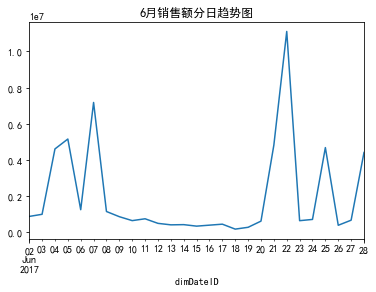

In [55]:
grouped_sale_sum = April_data.copy().groupby("dimDateID")["sale_sum"].sum()
grouped_sale_sum.plot(title = "6月销售额分日趋势图")

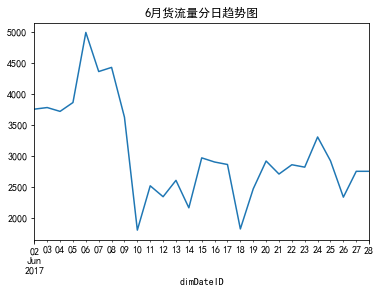

In [58]:
grouped_traffic = April_data[["dimDateID","goodsID"]].drop_duplicates().groupby("dimDateID")["goodsID"].count()
grouped_traffic.plot(title = "6月货流量分日趋势图")

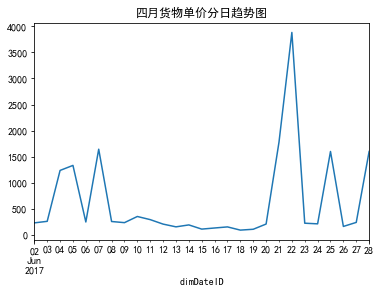

In [59]:
grouped_price = (grouped_sale_sum/grouped_traffic)
grouped_price.plot(title = "四月货物单价分日趋势图")

# 分周数据

In [60]:
April_data["weeknum"] = [time.weekday()+1 for time in April_data["dimDateID"]]

C:\Users\lining\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
April_data.head(4)

,id,salesID,salesNo,dimDateID,dimShopID,goodsID,QTY,AMT,pAMT,mpAMT,updateTime,date,月份,sale_sum,weeknum
0,1,1,34131002542176,2017-06-02,33,5130942,1.000,7.99,0.0,0.210,2017-09-09 02:24:25,2017-06-02,6,7.99000,5
1,2,2,34131002542177,2017-06-02,34,7116060,1.000,227.00,0.0,12.000,2017-09-09 02:24:25,2017-06-02,6,227.00000,5
2,3,3,34131002542178,2017-06-02,33,5621350,4.000,38.00,0.0,1.960,2017-09-09 02:24:25,2017-06-02,6,152.00000,5
3,4,3,34131002542178,2017-06-02,33,5613232,1.046,37.64,0.0,1.062,2017-09-09 02:24:25,2017-06-02,6,39.37144,5


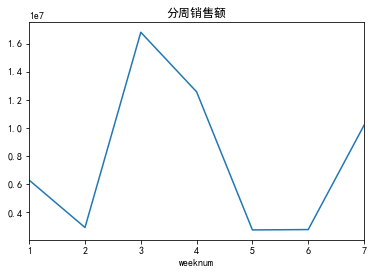

In [62]:
week_sale = April_data.copy().groupby("weeknum")["sale_sum"].sum()
week_sale.plot(title = "分周销售额")

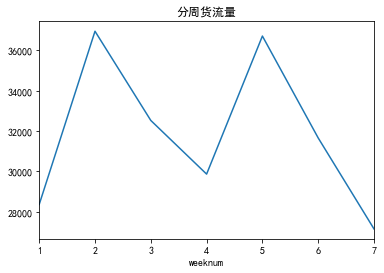

In [63]:
week_traffic = April_data.copy()[["goodsID","weeknum"]].groupby("weeknum")["goodsID"].count()
week_traffic.plot(title = "分周货流量")

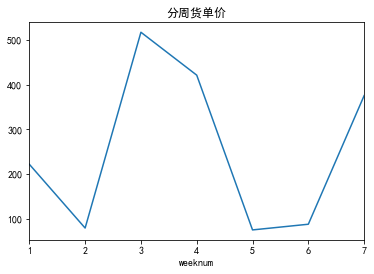

In [64]:
week_price = week_sale/week_traffic
week_price.plot(title = "分周货单价")